In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
train = pd.read_pickle('titanic-clean.pkl')
train.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2

In [3]:
X = train.drop('Survived', axis=1).values
# X = train.values
Y = train['Survived'].values

In [4]:
type(Y)

numpy.ndarray

In [5]:
X.shape

(889, 7)

In [6]:
X[:5, :]

array([[ 3.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ,  2.    ],
       [ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ],
       [ 3.    ,  0.    , 26.    ,  0.    ,  0.    ,  7.925 ,  2.    ],
       [ 1.    ,  0.    , 35.    ,  1.    ,  0.    , 53.1   ,  2.    ],
       [ 3.    ,  1.    , 35.    ,  0.    ,  0.    ,  8.05  ,  2.    ]])

In [7]:
Y[:5]

array([0, 1, 1, 1, 0])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30,random_state=101)

In [9]:
import tensorflow as tf
import keras
from keras.utils.np_utils import to_categorical

2023-07-29 12:13:15.228404: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-29 12:13:15.928537: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [10]:
tf.__version__

'2.10.0'

In [11]:
Y[0]

0

In [12]:
Y = to_categorical(Y)  

In [14]:
Y[:10]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [16]:
# y_train_cat = to_categorical(y_train)  # needed only when you are going to use "softmax" in o/p layer
# y_test_cat = to_categorical(y_test)

In [15]:
y_train[:5]

array([0, 1, 1, 1, 0])

In [16]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
K.clear_session()

In [24]:
X.shape

(889, 7)

In [33]:
model = Sequential()
model.add(Dense(16, input_dim=X.shape[1], activation='relu', kernel_initializer='glorot_normal')) #, \
#                kernel_regularizer='l2')) # 1st Hidden Layer
model.add(Dense(8, activation='relu', kernel_regularizer='l2'))  # 2nd Hidden Layer
model.add(Dense(2, activation='softmax')) # Output Layer 
# if using sigmoid, then go for 1 neuron in the o/p layer
# if using softmax, then go no. of neurons in the o/p layer == no. of classes.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # or "r2" or "neg_mean_squared_error"

# for multiclass >>> categorical_cross_entropy
# for regression >>> mean_squared_error

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                128       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 282
Trainable params: 282
Non-trainable params: 0
_________________________________________________________________


In [35]:
0.7*889

622.3

In [36]:
h = model.fit(X,Y, batch_size=100, epochs=50, verbose=1, validation_split=0.3)

Epoch 1/50
7/7 [==============================] - 1s 24ms/step - loss: 2.5489 - accuracy: 0.6061 - val_loss: 2.4422 - val_accuracy: 0.6442
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 2.3079 - accuracy: 0.6061 - val_loss: 2.2022 - val_accuracy: 0.6442
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 2.0815 - accuracy: 0.6061 - val_loss: 1.9744 - val_accuracy: 0.6442
Epoch 4/50
7/7 [==============================] - 0s 8ms/step - loss: 1.8729 - accuracy: 0.6061 - val_loss: 1.7478 - val_accuracy: 0.6442
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 1.6706 - accuracy: 0.6077 - val_loss: 1.5288 - val_accuracy: 0.6442
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 1.4779 - accuracy: 0.6077 - val_loss: 1.3198 - val_accuracy: 0.6442
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 1.2948 - accuracy: 0.6077 - val_loss: 1.1256 - val_accuracy: 0.6442
Epoch 8/50
7/7 [=================

In [37]:
# h.history

Text(0.5, 0, 'Epochs')

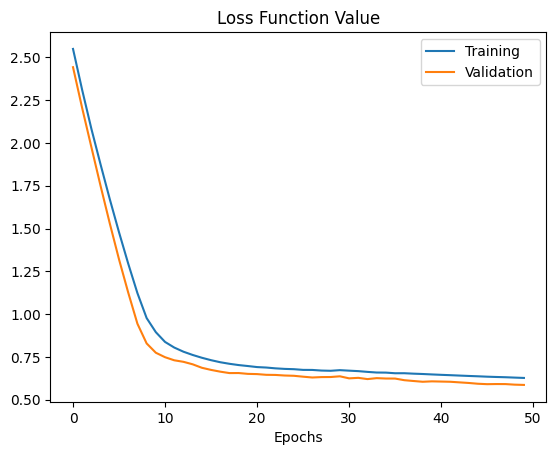

In [38]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss Function Value')
plt.xlabel('Epochs')
# plt.ylim([0,1])

Text(0.5, 0, 'Epochs')

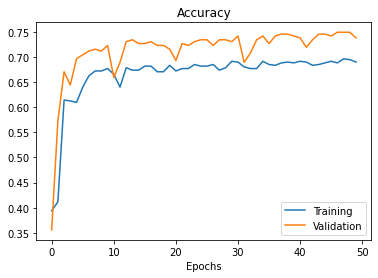

In [25]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')
# plt.ylim([0,1])

In [28]:
# test_accuracy = model.evaluate(X_test, y_test)[1]
# test_accuracy